In [ ]:
Determinados glossários como por exemplo de inicialização, finalização devem trazer os termos bom dia, boa tarde, boa noite etc.
Já os demais podemos explorar a remoção desses termos


PARA O PPT

Do lote 14 ao 27 observamos que houve 1064 registros de Falhas graves após a aplicação do modelo
Destes 800 são Falta de ETICA e 264 São BAIXO CALAO

Frequencia das palavras da coluna BAIXO CALAO e da coluna FALTA DE ETICA BANCO
Frequencia dos bigramas
Frequencia dos trigramas
Frequencia dos ngrams

1 selecionar a coluna com os termos, remover os caracteres especiais
2 contar as palavras


DUVIDA
utilizando a Heimdall aquele detalhe do ' lula ' = 'lula'?
no pré processamento das strings estamos removendo os espaços?


# Quantos registros são de BAIXO CALAO mesmo após aplicar o modelo
# Quantos registros são de FALTA DE ETICA mesmo após aplicar o modelo

# Qual a forma que a palavra normalmente aparece?

# E se removermos?


# Informações sobre as CHAMADAS 28 e 29


# PONTOS PARA AVALIAR NO SCRIPT/HEIMDALL
# vejo que o Will removeu as colunas de palavras localizadas / palavras do glossário
# avaliar o glossario para assegurar o uso devido do espaço no inicio e fim do termo
# checar se estamos removendo o espaco no inicio/fim do termo no glossário? 
#

https://medium.com/pyladiesbh/regex-b%C3%A1sico-em-python-31dcb7fac046
https://medium.com/pyladiesbh/estat%C3%ADstica-descritiva-1-ed523dffb99f
    

In [2]:
import sys
import numpy as np
import pandas as pd
from tqdm import tqdm
import random
import openpyxl
pd.options.display.max_columns = None

#Dataviz
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns

#NLP
import re
import string
import nltk
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

from nltk.collocations import *
from collections import Counter
from nltk import bigrams
from nltk import trigrams
from nltk import ngrams

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from skmultilearn.adapt import MLkNN, MLARAM
from scipy.sparse import csr_matrix, lil_matrix

from skmultilearn.problem_transform import BinaryRelevance, ClassifierChain, LabelPowerset
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, hamming_loss


import unicodedata

In [2]:
pd.options.display.max_colwidth=250

In [3]:
nps_df = pd.read_excel('Base_reviews_eda_curadoria.xlsx')

In [4]:
nps_df['tx_coment'] = nps_df['transcript']

### Modelo NPS Pandas

In [5]:
# ajuste manual
x_postura_baixo_calao = nps_df
x_falta_de_etica = nps_df

In [6]:
# POSTURA BAIXO CALAO

match = ['anta', 'besta', 'bicha', 'boba','bunda', 'cacete', 'cagar', 'cu', 'cagao', 'caloteira', 'caloteiro', 'caraia', 'caraio', 'caralho', 'chata', 'chupa', 'puta', 'corna', 'corno', 'bosta', 'deixa eu falar agora', 'desgracado', 'desgracada', 'diabo', 'e foda', 'foda', 'falta de respeito', 'ferrando', 'ferrar', 'puto', 'fodendo', 'idiota', 'ignorancia', 'vaca', 'tomar no cu', 'otario', 'otaria']
x_postura_baixo_calao['match'] = x_postura_baixo_calao['tx_coment'].str.contains('|'.join(match))
x_postura_baixo_calao = x_postura_baixo_calao[x_postura_baixo_calao['match']==True] 

In [7]:
# FALTA DE ETICA

match = ['banco central', 'mito', 'lula', 'bonsonaro', 'justica', 'reclame aqui', 'foi um erro do banco', 'e um roubo', 'pode me processar']
x_falta_de_etica['match'] = x_falta_de_etica['tx_coment'].str.contains('|'.join(match))
x_falta_de_etica = x_falta_de_etica[x_falta_de_etica['match']==True] 

In [8]:
x_postura_baixo_calao['x_postura_baixo_calao'] = 1
x_falta_de_etica['x_falta_de_etica'] = 1

C:\Users\vinic\AppData\Local\Temp/ipykernel_10128/1941397328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_postura_baixo_calao['x_postura_baixo_calao'] = 1
C:\Users\vinic\AppData\Local\Temp/ipykernel_10128/1941397328.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_falta_de_etica['x_falta_de_etica'] = 1


In [9]:
nps_df2 = nps_df.join([
    x_postura_baixo_calao['x_postura_baixo_calao'],
    x_falta_de_etica['x_falta_de_etica']])

nps_df = nps_df2

In [10]:
# substitui os valores nulos
nps_df['x_postura_baixo_calao'].fillna(0, inplace = True) 
nps_df['x_falta_de_etica'].fillna(0, inplace = True) 

In [11]:
nps_df['x_falta_de_etica'].unique()

array([0., 1.])

In [13]:
nps_df.head(1)

product_id   product_brand  overall_rating recommend_to_a_friend  \
0   113022329  philips walita               4                   Yes   

  reviewer_gender reviewer_state  \
0               M             SP   

                                                             connid  \
0  44f2c8edd93471926fff601274b8b2b5c4824e386ae4f210329b9b71890277fd   

                                                      interactionid  \
0  44f2c8edd93471926fff601274b8b2b5c4824e386ae4f210329b9b71890277fd   

               dt_refe data_abreviada  cd_peri  id_login  \
0  01/04/2020 12:08:14     01/04/2020   202004  84338544   

                nm_assistente         ds_site ds_area _ds_celula  \
0  RODRIGO GABRIEL DOS SANTOS  XS NEGOCIOS HN      PJ    AGÊNCIA   

                nm_supervisor                nm_gerente  \
0  RODRIGO GABRIEL DOS SANTOS  WALLESKA GIOVANNA GIGLIO   

               nm_coordenador          nm_superintentende  \
0  RODRIGO GABRIEL DOS SANTOS  RODRIGO GABRIEL DOS SANTOS   

                                                  ds_sub_celula   nr_pess  \
0  Panela de Pressão Elétrica Philips Walita Daily 5L com Timer  84338544   

   vl_tma  \
0     454   

                                                                                                                                                                                                                                     transcript  \
0  SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANELAS ELÉTRICAS.  COSTUMO USAR OUTRA PANELA PARA COZIMENTO DE ARROZ (JAPONESA), MAS LEVA MUITO TEMPO,  +/- 50 MINUTOS.  NESSA PANELA  É MUITO MAIS RÁPIDO, EXATAMENTE 6 MINUTOS.    EU RECOMENDO.   

  postura_baixo_calao_basic falta_de_etica_basic  QNT_RESP  QNT_DETRATOR  \
0                 ['match']                 ['']         1             0   

   QNT_NEUTRO  QNT_PROMOTOR INDC_NPS_FULL PRIORIDADE AREA  CONTATOS CELULA_BD  \
0           0             1      PROMOTOR    AGÊNCIA   PJ         1   CARTOES   

   default_value  \
0              1   

                                                                                                                                                                                                                                      tx_coment  \
0  SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANELAS ELÉTRICAS.  COSTUMO USAR OUTRA PANELA PARA COZIMENTO DE ARROZ (JAPONESA), MAS LEVA MUITO TEMPO,  +/- 50 MINUTOS.  NESSA PANELA  É MUITO MAIS RÁPIDO, EXATAMENTE 6 MINUTOS.    EU RECOMENDO.   

   match  x_postura_baixo_calao  x_falta_de_etica  
0  False                    0.0               0.0

### After & Before

In [4]:
MAXI = ['anta', 'besta', 'bicha', 'boba','bunda', 'cacete', 'cagar', 'cu', 'cagao', 'caloteira', 'caloteiro', 'caraia', 'caraio', 'caralho', 'chata', 'chupa', 'puta', 'corna', 'corno', 'bosta', 'deixa eu falar agora', 'desgracado', 'desgracada', 'diabo', 'e foda', 'foda', 'falta de respeito', 'ferrando', 'ferrar', 'puto', 'fodendo', 'idiota', 'ignorancia', 'vaca', 'tomar no cu', 'otario', 'otaria']

MINI = ['banco central', 'mito', 'lula', 'bonsonaro', 'justica', 'reclame aqui', 'foi um erro do banco', 'e um roubo', 'pode me processar']

In [65]:
reg_matches_before = []
reg_matches_after = []
complete_transcript = []
unique_keys = []
expressions = []

chaves =nps_df['connid'].values.tolist()
transcripts = nps_df['transcript'].values.tolist()
#products = df['ds_prod'].values.tolist()
#subproducts = df['ds_prod_sub'].values.tolist()

index_search = 1

"""
   
  for k, v in enumerate(MAXI):
        m = t.split(v)
        if(len(m[0]) == len(t)):
            continue
        else:
            for index_search, subtext in enumerate(m):
                if index_search == 0:
                    complete_transcript.append(t)
                else:
                    complete_transcript.append('')
                reg_matches_after.append(m[index_search-1][len(m[index_search-1])-200:len(m[index_search-1])])
                reg_matches_before.append(m[index_search][0:200])
                unique_keys.append(chaves[i])
                expressions.append(v)
                index_search += 1
                index_search = 1
    
    for k, v in enumerate(MINI):
        m = t.split(v)
        if(len(m[0]) == len(t)):
            continue
        else:
            for index_search, subtext in enumerate(m):
                if index_search == 0:
                    complete_transcript.append(t)
                else:
                    complete_transcript.append('')
                reg_matches_after.append(m[index_search-1][len(m[index_search-1])-200:len(m[index_search-1])])
                reg_matches_before.append(m[index_search][0:200])
                unique_keys.append(chaves[i])
                expressions.append(v)
                index_search += 1
                index_search = 1     
                """     
   
#teste com o REGEX
for i, t in enumerate(transcripts):
    for k, v in enumerate(MAXI):
        m = t.split(v)
        if(len(m[0]) == len(t)):
            continue
        else:
            TEXTO = m[index_search]
            my_regex_after = r"(?<=" +re.escape(TEXTO)+ "}).*"
            for index_search, subtext in enumerate(m):
                if index_search == 0:
                    complete_transcript.append(t)
                else:
                    complete_transcript.append('')
                #reg_matches_after.append(m[index_search-1][len(m[index_search-1])-200:len(m[index_search-1])])
                #reg_matches_after.append(re.search(r"((?<="+v+"}).*)",t))
                reg_matches_after.append(re.search(my_regex_after, t))
                #re.search(r"((?<=iu).*)",text_5) #after - original
                
                
                #reg_matches_before.append(m[index_search][0:200])
                reg_matches_before.append(re.search(r"(.*(?="+v+"}))",t))
                #re.search(r"(.*(?=iu))",text_5) #before - original
                
                
                unique_keys.append(chaves[i])
                expressions.append(v)
                index_search += 1
                index_search = 1        

In [66]:
nps_df_df2 = pd.DataFrame(list(zip(reg_matches_before, expressions, reg_matches_after, unique_keys, complete_transcript)),
                  columns = ['contexto_antes', 'termo', 'contexto_depois', 'chave_unica', 'transcricao_completa'])

nps_df_df2 = nps_df_df2.drop_duplicates(subset='chave_unica', keep='first')
print(nps_df_df2.shape)
nps_df_df2['termo'].value_counts()

(4586, 5)


cu                   4141
anta                  286
puta                   82
falta de respeito      55
chata                   9
vaca                    3
diabo                   2
besta                   2
foda                    1
ferrar                  1
cacete                  1
e foda                  1
otario                  1
boba                    1
Name: termo, dtype: int64

In [67]:
nps_df_df2[nps_df_df2['termo']=='puta'].head()

contexto_antes termo contexto_depois  \
119           None  puta            None   
314           None  puta            None   
455           None  puta            None   
504           None  puta            None   
569           None  puta            None   

                                           chave_unica  \
119  1521a783f7e5a116f45b9861142180bcb19718989bdf47...   
314  355fc618df4dd0e4a1ffe9cd42629c7254bbd64280db1a...   
455  f5057122448e8908a7bf9b5d7185c9ab7be322709cd45b...   
504  e5f10634a0deb2241df66df6b087a942cca5bf4571e4e3...   
569  bf4b8f9cd084b39724d3317b35df6a7a588193157034ed...   

                                  transcricao_completa  
119  O computador condiz com as características des...  
314  A assistência técnica poderia dar um pouco mai...  
455  Usei o produto só algumas vezes durante  um pe...  
504  Olá, tirei alguns Prints em meu computador sob...  
569  é lamentável que uma empresa conhecida e conce...

# OUTROS TESTES

In [71]:
# PONTOS PARA AVALIAR NO SCRIPT/HEIMDALL

# avaliar o glossario para assegurar o uso devido do espaço no inicio e fim do termo
# checar se estamos removendo o espaco no inicio/fim do termo no glossário? 
#

In [ ]:
a = r"((.|\n)*)(a\).*?)\n*?(b\).*?)\n*?(c\).*?)\n*?(d\).*?)\n*?(e\).*?)$|\n"

In [15]:
import spacy

# Importe o comparador - Matcher
from spacy.matcher import Matcher

nlp = spacy.load("pt_core_news_sm")

In [78]:
doc = nlp("Vazou a data de lançamento do novo iPhone X após a Apple revelar a existência de compras antecipadas.")

# Inicialize o comparador com o vocabulário compartilhado 
matcher = Matcher(nlp.vocab)

# Crie uma expressão que faça a correspondência dos tokens: "iPhone" and "X"
pattern = [{"TEXT": "iPhone"}, {"TEXT": "X"}]

# Adicione uma expressão ao comparador
matcher.add("IPHONE_X_PATTERN", [pattern])

# Use o comparador no doc
matches = matcher(doc)
print("Correspondências:", [doc[start:end].text for match_id, start, end in matches])

Correspondências: ['iPhone X']


In [4]:
import spacy
from spacy.matcher import Matcher

text= "Hall is a Tony Award winner and Grammy nominee"
nlp = spacy.load("pt_core_news_sm")
matcher = Matcher(nlp.vocab)
matcher.add("Winner", None, [{'POS': 'PROPN', 'OP':'+'}, {'TEXT': {'REGEX': '(?i)^(?:winner|recipient)$'}}])
doc = nlp(text)
matches = matcher(doc)
spans = [doc[start:end] for _, start, end in matches]
for span in spacy.util.filter_spans(spans):
    print(span.text)
# => Tony Award winner

ValueError: [E178] Each pattern should be a list of dicts, but got: {'POS': 'PROPN', 'OP': '+'}. Maybe you accidentally passed a single pattern to Matcher.add instead of a list of patterns? If you only want to add one pattern, make sure to wrap it in a list. For example: `matcher.add('Winner', [pattern])`

# PPT

In [32]:
evaluate = nps_df_df2['termo'].astype(str)

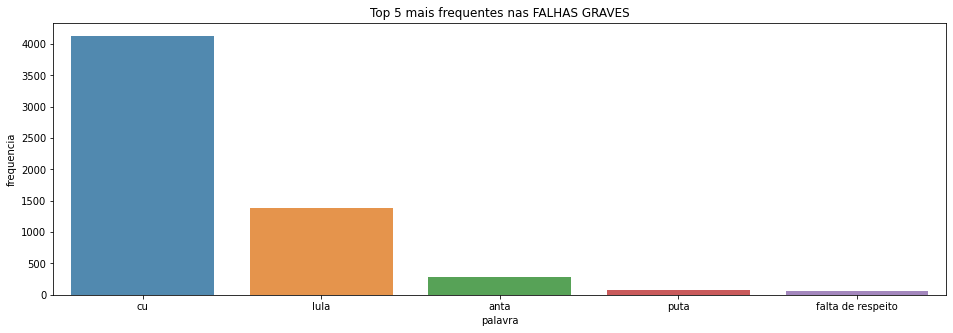

In [20]:
# Maior ocorrencia no FUP
frequencia = Counter(evaluate)
frequencia_df = pd.DataFrame.from_dict(frequencia, orient='index').reset_index()
frequencia_df.columns = ['Palavra', 'Frequencia']
frequencia_df.sort_values(by='frequencia', ascending=False, inplace=True)
freq_top = frequencia_df.head()
plt.figure(figsize=(16,5))
sns.barplot(x='palavra', y='frequencia', data=freq_top, alpha=0.85)
plt.title('Top 5 mais frequentes nas FALHAS GRAVES')
plt.show()


In [24]:
termos = nltk.FreqDist(evaluate)
termos.most_common(10)

[('cu', 4130),
 ('lula', 1383),
 ('anta', 286),
 ('puta', 82),
 ('falta de respeito', 55),
 ('reclame aqui', 19),
 ('chata', 9),
 ('vaca', 3),
 ('mito', 3),
 ('diabo', 2)]

In [30]:
bigramas = nltk.word_tokenize(str(evaluate))
bigramas = list(bigrams(bigramas))
bigramas

[('0', 'cu'),
 ('cu', '2'),
 ('2', 'lula'),
 ('lula', '4'),
 ('4', 'cu'),
 ('cu', '6'),
 ('6', 'cu'),
 ('cu', '8'),
 ('8', 'cu'),
 ('cu', '...'),
 ('...', '13987'),
 ('13987', 'cu'),
 ('cu', '13989'),
 ('13989', 'cu'),
 ('cu', '13991'),
 ('13991', 'cu'),
 ('cu', '13993'),
 ('13993', 'cu'),
 ('cu', '13995'),
 ('13995', 'cu'),
 ('cu', 'Name'),
 ('Name', ':'),
 (':', 'termo'),
 ('termo', ','),
 (',', 'Length'),
 ('Length', ':'),
 (':', '5980'),
 ('5980', ','),
 (',', 'dtype'),
 ('dtype', ':'),
 (':', 'object')]

In [35]:
evaluate = nps_df['transcript'].astype(str)

count_vectorizer = TfidfVectorizer(stop_words=stopwords)

count_data = count_vectorizer.fit_transform(evaluate)

number_topics = 11
number_words = 5

TypeError: 'LazyCorpusLoader' object is not iterable